# Data Visualization with matplotlib

In [1]:
import matplotlib.pyplot as plt

## Basic graph

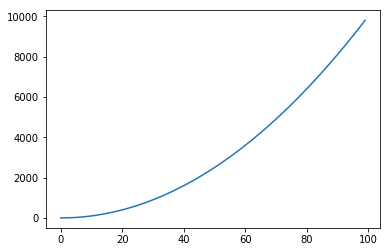

In [5]:
x = range(100)
y = [value**2 for value in x]
plt.plot(x,y)
plt.show()

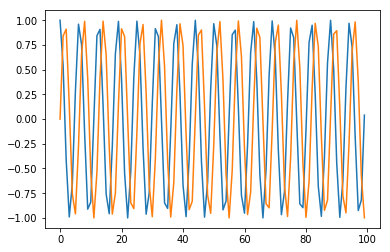

In [6]:
import numpy as np

x_1 = range(100)
y_1 = [np.cos(value) for value in x_1]

x_2 = range(100)
y_2 = [np.sin(value) for value in x_2]

plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
plt.show()

## Set Color

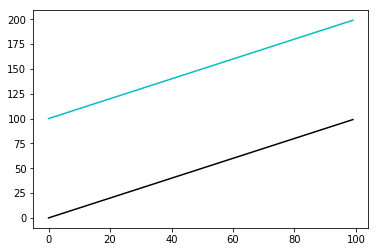

In [8]:
x_1 = range(100)
y_1 = [value for value in x_1]

x_2 = range(100)
y_2 = [value+100 for value in x_2]

plt.plot(x_1, y_1, color="#000000")
plt.plot(x_2, y_2, c='c')

plt.show()

## Set linestyle

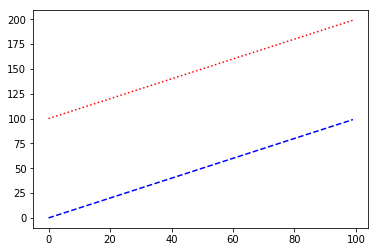

In [11]:
plt.plot(x_1, y_1, c='b', linestyle='dashed')
plt.plot(x_2, y_2, c='r', linestyle='dotted')

plt.show()

## Set title

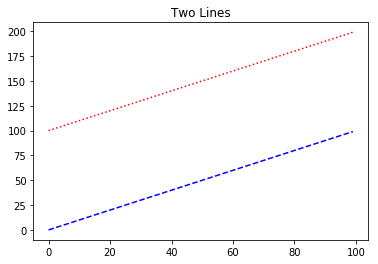

In [12]:
plt.plot(x_1, y_1, c='b', linestyle='dashed')
plt.plot(x_2, y_2, c='r', linestyle='dotted')

plt.title("Two Lines")
plt.show()

## Set legend

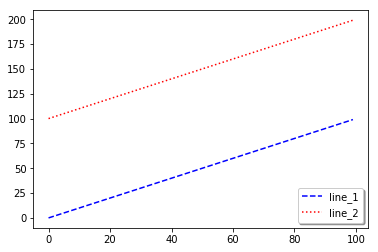

In [13]:
plt.plot(x_1, y_1, c='b', linestyle='dashed', label='line_1')
plt.plot(x_2, y_2, c='r', linestyle='dotted', label='line_2')
plt.legend(shadow=True, fancybox=True, loc='lower right')

plt.show()

## Set grid and xylim

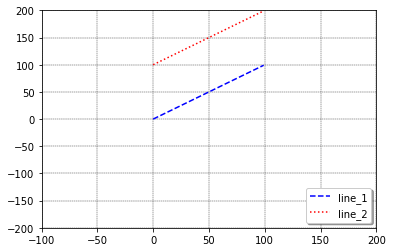

In [15]:
plt.plot(x_1, y_1, c='b', linestyle='dashed', label='line_1')
plt.plot(x_2, y_2, c='r', linestyle='dotted', label='line_2')
plt.legend(shadow=True, fancybox=True, loc='lower right')

plt.grid(True, lw=0.4, ls='--', c='0.09')
plt.xlim(-100, 200)
plt.ylim(-200, 200)

plt.show()

## Scatter

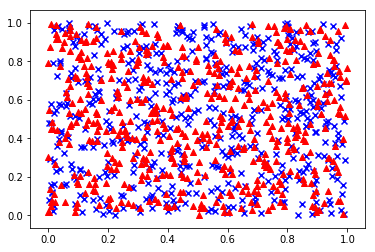

In [20]:
#scatter 내부 x와 y의 길이는 같아야 한다

data_1 = np.random.rand(512, 2)
data_2 = np.random.rand(512, 2)

plt.scatter(data_1[:,0], data_1[:,1], c='b', marker='x')
plt.scatter(data_2[:,0], data_2[:,1], c='r', marker='^')

plt.show()

## Scatter plot size manipulation

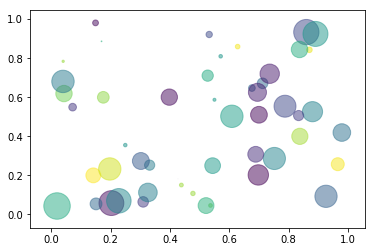

In [29]:
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)
area = np.pi * (15*np.random.rand(n))**2
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

plt.show()

# Matplotlib with Pandas

In [32]:
import pandas as pd

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data' #Data URL
df_data = pd.read_csv(data_url, sep='\s+', header = None) #csv 타입 데이터 로드, separate는 빈공간으로 지정하고, Column은 없음
df_data.columns = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO' ,'B', 'LSTAT', 'MEDV']
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


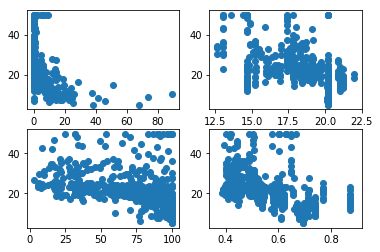

In [36]:
fig = plt.figure()
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))
    
ax[0].scatter(df_data["CRIM"], df_data["MEDV"])
ax[1].scatter(df_data["PTRATIO"], df_data["MEDV"])
ax[2].scatter(df_data["AGE"], df_data["MEDV"])
ax[3].scatter(df_data["NOX"], df_data["MEDV"])
plt.show()

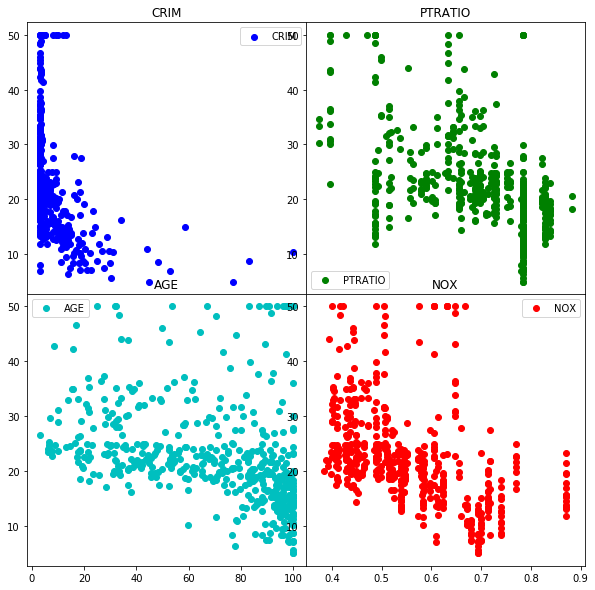

In [37]:
fig = plt.figure()
fig.set_size_inches(10.0, 10.0, forward=True)
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))

columns = ["CRIM", "PTRATIO", "AGE", "NOX"]
colors = ["b", "g", "c", "r"]
for i in range(4):
    ax[i].scatter(df_data[columns[i]], df_data["MEDV"], color=colors[i], label=columns[i])
    ax[i].legend()
    ax[i].set_title(columns[i])

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

/Users/jonghobaeck/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jonghobaeck/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


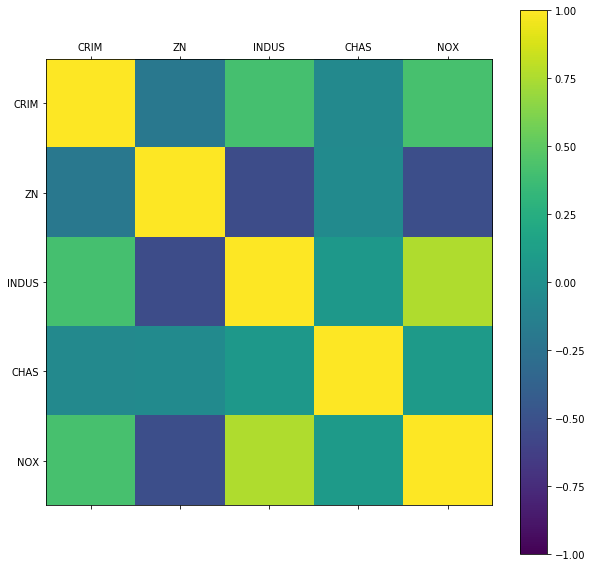

In [40]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_data = std_scaler.fit_transform(df_data)
scale_data

corr_data = np.corrcoef(scale_data.T[:5])
corr_data

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_data, vmin=-1, vmax=1,  interpolation='nearest')
fig.colorbar(cax)
fig.set_size_inches(10,10)
ticks= np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(df_data.columns[:5])
ax.set_yticklabels(df_data.columns[:5])

plt.show()

# Missing Values

What to do when we have missing data. You could
1. Drop samples
2. Drop the entire features of a data
3. Replace missing values with either median or mean values of the specific feature

In [1]:
import numpy as np
import pandas as pd

# Eaxmple from - https://chrisalbon.com/python/pandas_missing_data.html
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
        'age': [42, np.nan, 36, 24, 73],
        'sex': ['m', np.nan, 'f', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [3]:
#check how many missing values there are by column
df.isnull().sum()

first_name       1
last_name        1
age              1
sex              1
preTestScore     2
postTestScore    2
dtype: int64

Drop by row

In [4]:
#drop row if all columns of that row are missing
df_cleaned = df.dropna(how='all')
df_cleaned

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


Drop by column

In [5]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [6]:
df.dropna(axis=1, how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [9]:
#set a threshold if there are more than 3 missing in column direction
df.dropna(axis=1, thresh=3)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0
